<a href="https://colab.research.google.com/github/adelomana/HUVECs/blob/main/QN_untargetted_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas, numpy
import sklearn, sklearn.preprocessing

import seaborn
seaborn.set_theme(style="whitegrid", font_scale=2)

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(9, 6)})

# User-defined variables

In [ ]:
data_file = '/content/drive/MyDrive/hi/research/huvec/data/untargetted/ROSA_ACID_NEG_UT_NOMISNORM_AllBatches_untransformed.xlsx'
original_data = pandas.read_excel(data_file)
original_data.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,287.490913,468.605181,189.373225,576.720535,321.251154,490.368895,6963.243332,1574.419726,205.341230,224.308740,273.927171,877.335573,470.892562,333.699610,328.664004,451.849107,255.823982,427.261020,809.868345,187.765964,2379.782477,1794.563908,301.687304,343.101666,9183.700633,1617.937473,501.692771,1423.538506,540.586777,6996.861661,164.560730,3803.668263,788.843769,7948.654401,...,2914.012027,1377.308725,459.196085,911.317857,648.750017,1306.241545,1036.776239,333.258836,340.560957,594.988448,511.016845,565.775508,471.063525,508.009050,523.419610,1716.136440,2546.638937,2609.318638,1956.692269,441.883890,441.863417,660.379119,840.826958,760.880568,695.286961,817.192215,991.108049,976.389606,418.349805,465.041623,465.887121,538.617987,445.230813,507.349690,316.742342,1704.549078,2324.193317,3058.642052,2278.023742,2335.314302
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,180.314261,538.342307,130.499826,603.217924,474.653477,426.956672,3643.910179,1315.831068,154.358128,170.502985,141.419741,1008.719708,260.182278,307.853534,385.353900,394.298563,257.420961,356.154982,893.362617,146.362903,2221.776633,1899.102687,346.257780,563.510648,12745.771755,1758.926679,568.463687,1598.700980,864.849029,11251.661840,126.246838,6095.439939,931.007398,11289.340126,...,877.387875,483.564382,356.341304,334.613655,237.253390,933.935392,971.276817,230.447689,232.782617,528.532968,859.251759,759.416550,715.501147,755.374832,802.264420,2518.407027,2168.859733,3861.084636,2760.544162,245.639511,238.226015,490.326750,496.843251,459.357601,848.163388,1008.164445,1206.062256,1192.698376,590.837772,720.730101,715.677228,713.253520,518.775906,755.134538,123.522480,2331.474888,3382.452083,2496.359276,3421.428464,3531.897024
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,284.725250,346.699905,391.221386,430.336737,513.463286,895.284301,4228.235643,1443.006843,212.677132,391.189120,184.021619,380.373754,372.662550,854.720268,261.902817,454.430091,465.153277,610.078689,2284.832782,204.582924,3187.175952,3592.198479,389.760628,356.037317,19204.944485,2452.583144,645.812813,1358.152164,675.211871,8879.085049,229.784299,3715.155160,754.295076,2480.943852,...,273.659818,312.259142,293.755459,289.046341,180.474782,448.236634,443.534949,112.227982,112.674243,520.065709,475.640395,443.721159,565.961718,573.122668,572.232220,1453.883817,2247.032011,1237.646837,1778.598486,94.002886,91.201836,290.172797,258.341331,302.159835,539.552561,715.857145,890.422482,811.119499,322.999474,434.417560,430.145981,471.505944,371.

# Normalize data by cell numbers

In [ ]:
info = original_data.iloc[:, :6]
info.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME
0,EC_Rosa_1_659,4,EGM,1,480000.0,0
1,EC_Rosa_1_666,5,EGM,1,480000.0,0
2,EC_Rosa_1_668,3,EGM,1,480000.0,0
3,EC_Rosa_1_695,31,EGM,2,NaN,0
4,EC_Rosa_1_711,32,EGM,2,NaN,0


In [ ]:
intensities = original_data.iloc[:, 6:]
intensities.head()

,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,X97.009529999999998,X100.0742,X102.02508,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,287.490913,468.605181,189.373225,576.720535,321.251154,490.368895,6963.243332,1574.419726,205.341230,224.308740,273.927171,877.335573,470.892562,333.699610,328.664004,451.849107,255.823982,427.261020,809.868345,187.765964,2379.782477,1794.563908,301.687304,343.101666,9183.700633,1617.937473,501.692771,1423.538506,540.586777,6996.861661,164.560730,3803.668263,788.843769,7948.654401,15857.020909,419.516347,6497.716679,1078.433195,169.377827,179.527448,...,2914.012027,1377.308725,459.196085,911.317857,648.750017,1306.241545,1036.776239,333.258836,340.560957,594.988448,511.016845,565.775508,471.063525,508.009050,523.419610,1716.136440,2546.638937,2609.318638,1956.692269,441.883890,441.863417,660.379119,840.826958,760.880568,695.286961,817.192215,991.108049,976.389606,418.349805,465.041623,465.887121,538.617987,445.230813,507.349690,316.742342,1704.549078,2324.193317,3058.642052,2278.023742,2335.314302
1,180.314261,538.342307,130.499826,603.217924,474.653477,426.956672,3643.910179,1315.831068,154.358128,170.502985,141.419741,1008.719708,260.182278,307.853534,385.353900,394.298563,257.420961,356.154982,893.362617,146.362903,2221.776633,1899.102687,346.257780,563.510648,12745.771755,1758.926679,568.463687,1598.700980,864.849029,11251.661840,126.246838,6095.439939,931.007398,11289.340126,15395.190227,366.601488,6270.555226,850.936876,210.759353,122.288292,...,877.387875,483.564382,356.341304,334.613655,237.253390,933.935392,971.276817,230.447689,232.782617,528.532968,859.251759,759.416550,715.501147,755.374832,802.264420,2518.407027,2168.859733,3861.084636,2760.544162,245.639511,238.226015,490.326750,496.843251,459.357601,848.163388,1008.164445,1206.062256,1192.698376,590.837772,720.730101,715.677228,713.253520,518.775906,755.134538,123.522480,2331.474888,3382.452083,2496.359276,3421.428464,3531.897024
2,284.725250,346.699905,391.221386,430.336737,513.463286,895.284301,4228.235643,1443.006843,212.677132,391.189120,184.021619,380.373754,372.662550,854.720268,261.902817,454.430091,465.153277,610.078689,2284.832782,204.582924,3187.175952,3592.198479,389.760628,356.037317,19204.944485,2452.583144,645.812813,1358.152164,675.211871,8879.085049,229.784299,3715.155160,754.295076,2480.943852,16171.140136,757.434438,10651.775980,1655.293914,310.782738,163.784634,...,273.659818,312.259142,293.755459,289.046341,180.474782,448.236634,443.534949,112.227982,112.674243,520.065709,475.640395,443.721159,565.961718,573.122668,572.232220,1453.883817,2247.032011,1237.646

In [ ]:
intensities_by_cell = intensities.div(original_data['Cell  number']/1e6, axis=0)
intensities_by_cell.head()

,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,X97.009529999999998,X100.0742,X102.02508,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,598.939402,976.260794,394.527553,1201.501115,669.273238,1021.601865,14506.756942,3280.041095,427.794229,467.309876,570.681606,1827.782444,981.026172,695.207521,684.716675,941.352305,532.966630,890.127126,1687.225719,391.179091,4957.880161,3738.674808,628.515216,714.795137,19132.709653,3370.703068,1045.193274,2965.705220,1126.222452,14576.795128,342.834854,7924.308880,1643.424519,16559.696669,33035.460227,873.992391,13536.909747,2246.735823,352.870474,374.015516,...,6070.858389,2869.393177,956.658510,1898.578868,1351.562534,2721.336552,2159.950497,694.289242,709.501994,1239.559267,1064.618427,1178.698975,981.382345,1058.352188,1090.457521,3575.284249,5305.497785,5436.080495,4076.442228,920.591438,920.548785,1375.789831,1751.722828,1585.167849,1448.514503,1702.483781,2064.808436,2034.145011,871.562094,968.836715,970.598168,1122.120807,927.564193,1056.978522,659.879879,3551.143913,4842.069410,6372.170942,4745.882797,4865.238129
1,375.654710,1121.546473,271.874638,1256.704008,988.861411,889.493067,7591.479539,2741.314726,321.579434,355.214552,294.624460,2101.499392,542.046412,641.361529,802.820624,821.455340,536.293668,741.989545,1861.172118,304.922715,4628.701319,3956.463931,721.370375,1173.980517,26553.691157,3664.430581,1184.299349,3330.627042,1801.768811,23440.962167,263.014245,12698.833206,1939.598746,23519.458597,32073.312973,763.753101,13063.656722,1772.785159,439.081986,254.767275,...,1827.891406,1007.425796,742.377716,697.111781,494.277895,1945.698734,2023.493370,480.099351,484.963786,1101.110349,1790.107830,1582.117813,1490.627390,1573.697567,1671.384208,5246.681307,4518.457777,8043.926325,5751.133672,511.748981,496.304199,1021.514063,1035.090106,956.995003,1767.007059,2100.342593,2512.629699,2484.788283,1230.912026,1501.521043,1490.994224,1485.944833,1080.783137,1573.196955,257.338500,4857.239351,7046.775172,5200.748491,7127.975967,7358.118801
2,593.177604,722.291469,815.044553,896.534868,1069.715180,1865.175628,8808.824257,3006.264256,443.077358,814.977334,383.378373,792.445320,776.380311,1780.667226,545.630870,946.729356,969.069326,1270.997269,4760.068295,426.214425,6639.949900,7483.746831,812.001309,741.744410,40010.301010,5109.548216,1345.443361,2829.483675,1406.691398,18498.093853,478.717289,7739.906584,1571.448075,5168.633026,33689.875284,1577.988412,22191.199959,3448.528988,647.464037,341.217986,...,570.124622,650.539878,611.990539,602.179877,375.989130,933.826321,924.031144,233.808296,234.738007,1083.470226,990.917489,924.41908

In [ ]:
normalized_met_by_cell = pandas.concat([info, intensities_by_cell.reindex(info.index)], axis=1)
normalized_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,598.939402,976.260794,394.527553,1201.501115,669.273238,1021.601865,14506.756942,3280.041095,427.794229,467.309876,570.681606,1827.782444,981.026172,695.207521,684.716675,941.352305,532.966630,890.127126,1687.225719,391.179091,4957.880161,3738.674808,628.515216,714.795137,19132.709653,3370.703068,1045.193274,2965.705220,1126.222452,14576.795128,342.834854,7924.308880,1643.424519,16559.696669,...,6070.858389,2869.393177,956.658510,1898.578868,1351.562534,2721.336552,2159.950497,694.289242,709.501994,1239.559267,1064.618427,1178.698975,981.382345,1058.352188,1090.457521,3575.284249,5305.497785,5436.080495,4076.442228,920.591438,920.548785,1375.789831,1751.722828,1585.167849,1448.514503,1702.483781,2064.808436,2034.145011,871.562094,968.836715,970.598168,1122.120807,927.564193,1056.978522,659.879879,3551.143913,4842.069410,6372.170942,4745.882797,4865.238129
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,375.654710,1121.546473,271.874638,1256.704008,988.861411,889.493067,7591.479539,2741.314726,321.579434,355.214552,294.624460,2101.499392,542.046412,641.361529,802.820624,821.455340,536.293668,741.989545,1861.172118,304.922715,4628.701319,3956.463931,721.370375,1173.980517,26553.691157,3664.430581,1184.299349,3330.627042,1801.768811,23440.962167,263.014245,12698.833206,1939.598746,23519.458597,...,1827.891406,1007.425796,742.377716,697.111781,494.277895,1945.698734,2023.493370,480.099351,484.963786,1101.110349,1790.107830,1582.117813,1490.627390,1573.697567,1671.384208,5246.681307,4518.457777,8043.926325,5751.133672,511.748981,496.304199,1021.514063,1035.090106,956.995003,1767.007059,2100.342593,2512.629699,2484.788283,1230.912026,1501.521043,1490.994224,1485.944833,1080.783137,1573.196955,257.338500,4857.239351,7046.775172,5200.748491,7127.975967,7358.118801
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,593.177604,722.291469,815.044553,896.534868,1069.715180,1865.175628,8808.824257,3006.264256,443.077358,814.977334,383.378373,792.445320,776.380311,1780.667226,545.630870,946.729356,969.069326,1270.997269,4760.068295,426.214425,6639.949900,7483.746831,812.001309,741.744410,40010.301010,5109.548216,1345.443361,2829.483675,1406.691398,18498.093853,478.717289,7739.906584,1571.448075,5168.633026,...,570.124622,650.539878,611.990539,602.179877,375.989130,933.826321,924.031144,233.808296,234.738007,1083.470226,990.917489,924.419081,1179.086912,1194.005559,1192.150458,3028.924618,4681.316689,2578.430911,3705.413513,195.839345,190.003825,604.526660,538.211107,629.499656,1124.067835,1491.369053,

In [ ]:
# remove conditions for which cell numbers are not available
print('conditions before filtering {}'.format(normalized_met_by_cell.shape[0]))
finite_normalized_met_by_cell = normalized_met_by_cell[numpy.isfinite(normalized_met_by_cell['Cell  number']) == True]
print('conditions after filtering {}'.format(finite_normalized_met_by_cell.shape[0]))

conditions before filtering 130
conditions after filtering 121


In [ ]:
finite_normalized_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,598.939402,976.260794,394.527553,1201.501115,669.273238,1021.601865,14506.756942,3280.041095,427.794229,467.309876,570.681606,1827.782444,981.026172,695.207521,684.716675,941.352305,532.966630,890.127126,1687.225719,391.179091,4957.880161,3738.674808,628.515216,714.795137,19132.709653,3370.703068,1045.193274,2965.705220,1126.222452,14576.795128,342.834854,7924.308880,1643.424519,16559.696669,...,6070.858389,2869.393177,956.658510,1898.578868,1351.562534,2721.336552,2159.950497,694.289242,709.501994,1239.559267,1064.618427,1178.698975,981.382345,1058.352188,1090.457521,3575.284249,5305.497785,5436.080495,4076.442228,920.591438,920.548785,1375.789831,1751.722828,1585.167849,1448.514503,1702.483781,2064.808436,2034.145011,871.562094,968.836715,970.598168,1122.120807,927.564193,1056.978522,659.879879,3551.143913,4842.069410,6372.170942,4745.882797,4865.238129
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,375.654710,1121.546473,271.874638,1256.704008,988.861411,889.493067,7591.479539,2741.314726,321.579434,355.214552,294.624460,2101.499392,542.046412,641.361529,802.820624,821.455340,536.293668,741.989545,1861.172118,304.922715,4628.701319,3956.463931,721.370375,1173.980517,26553.691157,3664.430581,1184.299349,3330.627042,1801.768811,23440.962167,263.014245,12698.833206,1939.598746,23519.458597,...,1827.891406,1007.425796,742.377716,697.111781,494.277895,1945.698734,2023.493370,480.099351,484.963786,1101.110349,1790.107830,1582.117813,1490.627390,1573.697567,1671.384208,5246.681307,4518.457777,8043.926325,5751.133672,511.748981,496.304199,1021.514063,1035.090106,956.995003,1767.007059,2100.342593,2512.629699,2484.788283,1230.912026,1501.521043,1490.994224,1485.944833,1080.783137,1573.196955,257.338500,4857.239351,7046.775172,5200.748491,7127.975967,7358.118801
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,593.177604,722.291469,815.044553,896.534868,1069.715180,1865.175628,8808.824257,3006.264256,443.077358,814.977334,383.378373,792.445320,776.380311,1780.667226,545.630870,946.729356,969.069326,1270.997269,4760.068295,426.214425,6639.949900,7483.746831,812.001309,741.744410,40010.301010,5109.548216,1345.443361,2829.483675,1406.691398,18498.093853,478.717289,7739.906584,1571.448075,5168.633026,...,570.124622,650.539878,611.990539,602.179877,375.989130,933.826321,924.031144,233.808296,234.738007,1083.470226,990.917489,924.419081,1179.086912,1194.005559,1192.150458,3028.924618,4681.316689,2578.430911,3705.413513,195.839345,190.003825,604.526660,538.211107,629.499656,1124.067835,1491.369053,

# Visualize metabolites raw values

In [ ]:
peak_names = finite_normalized_met_by_cell.columns.to_list()[6:]
print(len(peak_names))
peak_names[:10]

1230


['X59.01097',
 'X61.017890000000001',
 'X67.016220000000004',
 'X74.021450000000002',
 'X77.052040000000005',
 'X77.052049999999994',
 'X78.956580000000002',
 'X78.956770000000006',
 'X79.955420000000004',
 'X80.962869999999995']

[Text(0, 0.5, 'Intensity')]

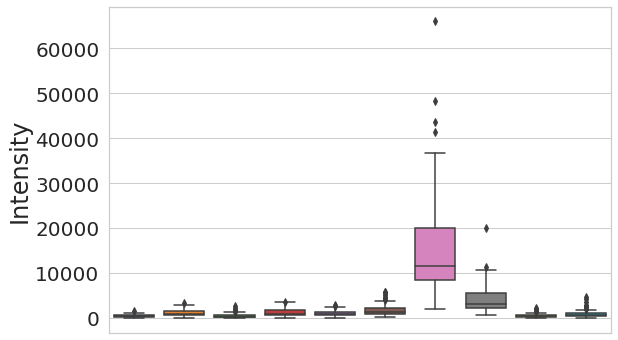

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=finite_normalized_met_by_cell[peak_names[:10]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='Intensity')

[Text(0, 0.5, 'Intensity')]

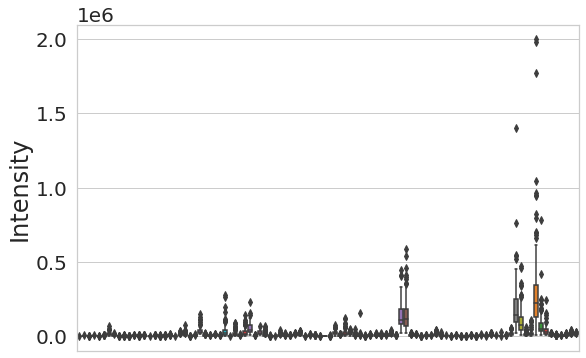

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=finite_normalized_met_by_cell[peak_names[:100]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='Intensity')

[Text(0, 0.5, 'Intensity')]

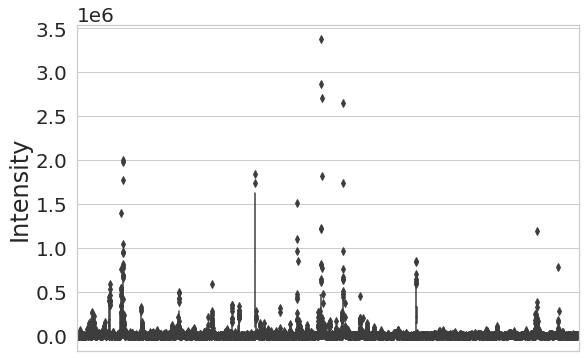

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=finite_normalized_met_by_cell[peak_names[:1000]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='Intensity')

# Bring intensities to log10 scale

In [ ]:
info = finite_normalized_met_by_cell.iloc[:, :6]
data = finite_normalized_met_by_cell.iloc[:, 6:]
transformed = data.apply(numpy.log10)
log10_finite_normalize_met_by_cell = pandas.concat([info, transformed.reindex(info.index)], axis=1)
log10_finite_normalize_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,2.777383,2.989566,2.596077,3.079724,2.825603,3.009282,4.161570,3.515879,2.631235,2.669605,2.756394,3.261925,2.991681,2.842114,2.835511,2.973752,2.726700,2.949452,3.227173,2.592376,3.695296,3.572718,2.798316,2.854182,4.281776,3.527720,3.019197,3.472128,3.051624,4.163662,2.535085,3.898961,3.215750,4.219052,...,3.783250,3.457790,2.980757,3.278429,3.130836,3.434782,3.334444,2.841540,2.850954,3.093267,3.027194,3.071403,2.991838,3.024630,3.037609,3.553311,3.724726,3.735286,3.610281,2.964067,2.964047,3.138552,3.243465,3.200075,3.160923,3.231083,3.314880,3.308382,2.940298,2.986251,2.987039,3.050040,2.967344,3.024066,2.819465,3.550368,3.685031,3.804287,3.676317,3.687104
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,2.574789,3.049817,2.434369,3.099233,2.995135,2.949143,3.880326,3.437959,2.507288,2.550491,2.469269,3.322529,2.734036,2.807103,2.904619,2.914584,2.729403,2.870398,3.269787,2.484190,3.665459,3.597307,2.858158,3.069661,4.424125,3.564006,3.073461,3.522526,3.255699,4.369975,2.419979,4.103764,3.287712,4.371427,...,3.261950,3.003213,2.870625,2.843302,2.693971,3.289076,3.306102,2.681331,2.685709,3.041831,3.252879,3.199239,3.173369,3.196921,3.223076,3.719885,3.654990,3.905468,3.759753,2.709057,2.695748,3.009244,3.014978,2.980910,3.247238,3.322290,3.400128,3.395289,3.090227,3.176531,3.173476,3.172003,3.033739,3.196783,2.410505,3.686390,3.847990,3.716066,3.852966,3.866767
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,2.773185,2.858712,2.911181,2.952567,3.029268,3.270720,3.944918,3.478027,2.646480,2.911146,2.583628,2.898969,2.890075,3.250583,2.736899,2.976226,2.986355,3.104145,3.677613,2.629628,3.822165,3.874119,2.909557,2.870254,4.602172,3.708383,3.128865,3.451707,3.148199,4.267127,2.680079,3.888736,3.196300,3.713376,...,2.755970,2.813274,2.786745,2.779726,2.575175,2.970266,2.965687,2.368860,2.370583,3.034817,2.996037,2.965869,3.071546,3.077006,3.076331,3.481288,3.670368,3.411355,3.568837,2.291900,2.278762,2.781415,2.730953,2.798995,3.050793,3.173585,3.268355,3.227844,2.827961,2.956666,2.952375,2.992246,2.888343,3.064598,2.334000,3.595451,3.547835,3.587492,3.563889,3.558928
9,EC_Rosa_1_787,85,EGM,4,270000.0,0,2.793198,3.261364,2.669590,3.367940,3.280535,3.445675,4.373775,3.903656,2.820162,2.815805,2.771533,3.444332,3.183399,3.200013,2.932876,3.256056,2.806004,3.306826,3.558245,2.871553,3.905686,3.915291,2.968110,2.845512,4.580069,3.889563,3.477014,3.812731,3.378651,3.883846,2.826934,4.434001,3.726279,4.768141,...,3.760187,3.639127,3.362112,3.404414,3.220208,3.908493,3.884432,3.332305,3.330

[Text(0, 0.5, 'log10 Intensity')]

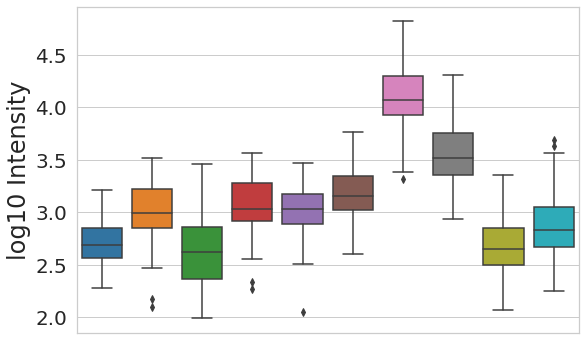

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=log10_finite_normalize_met_by_cell[peak_names[:10]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='log10 Intensity')

[Text(0, 0.5, 'log10 Intensity')]

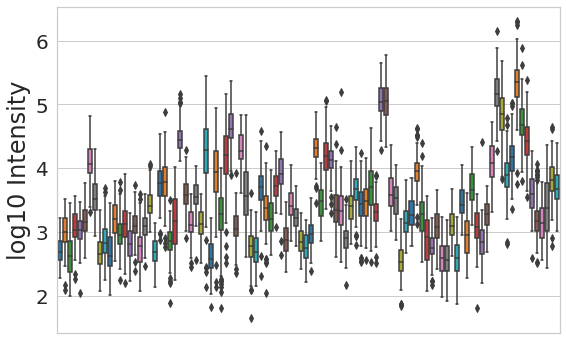

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=log10_finite_normalize_met_by_cell[peak_names[:100]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='log10 Intensity')

[Text(0, 0.5, 'log10 Intensity')]

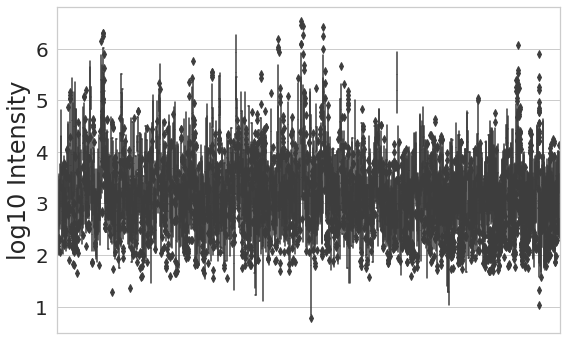

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=log10_finite_normalize_met_by_cell[peak_names[:1000]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='log10 Intensity')

# Explore batch effect

In [ ]:
metabolite_peak = 'X147.02834999999999' 
metabolite_name = '2-hydroxy glutarate'
treatment = 10
timepoint =  4

In [ ]:
sub = log10_finite_normalize_met_by_cell[(log10_finite_normalize_met_by_cell['Treatment'] == treatment) & (log10_finite_normalize_met_by_cell['TIME'] == timepoint)]
sub.head(20)

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
26,EC_Rosa_1_670,13,10,1,380000.0,4,2.664744,3.041813,2.587108,3.109148,3.118006,3.137512,4.214312,3.407401,2.722935,2.999944,2.655117,3.231774,2.903810,2.919754,2.840605,3.109518,2.647799,2.974591,3.528870,2.696892,3.802145,3.814820,2.859845,3.189203,4.354287,3.497099,3.385342,3.699961,3.286609,4.308660,2.351283,3.943283,3.289400,4.268975,...,3.268070,3.222162,2.961693,3.086819,3.031735,2.671704,2.685627,2.127853,2.130608,3.061427,2.674281,2.787972,3.323075,3.275536,3.289586,3.683296,3.898796,3.886769,3.781914,2.305106,2.287047,2.509403,2.509267,2.526796,3.189430,3.266214,3.368835,3.349562,2.907786,2.938644,2.936870,3.009301,2.950762,3.243224,2.179341,3.642933,3.781160,3.819667,3.590517,3.782912
27,EC_Rosa_1_674,12,10,1,380000.0,4,2.723357,3.113613,3.118123,3.220419,3.132687,3.266654,3.931758,3.713607,2.480744,2.803937,2.469041,3.171944,3.036893,3.188753,2.723492,3.166609,3.157411,3.252991,3.494117,2.727612,4.199797,4.253026,2.899566,4.017384,4.415244,3.707691,3.117147,3.661364,3.158206,4.883296,2.574024,4.716012,3.810263,4.530007,...,3.319432,3.554194,2.983101,3.227783,3.046096,3.194965,3.164785,2.761458,2.775114,3.201411,3.003616,3.160549,3.350434,3.359615,3.369193,3.708844,3.854373,3.914981,3.763423,2.796740,2.808939,3.039159,3.003682,3.001121,3.405389,3.486031,3.537800,3.533427,3.410572,3.557440,3.615376,3.530605,3.439150,3.382137,2.460953,3.850840,3.772340,3.850280,3.829845,3.851151
28,EC_Rosa_1_682,14,10,1,380000.0,4,2.941612,3.253488,2.501891,3.283325,3.124879,3.239916,4.085609,3.473368,2.731553,2.864978,2.346945,3.216388,2.828025,3.153529,2.858104,3.183934,2.633110,3.117777,3.473854,2.705494,3.924673,4.033059,2.995878,3.605404,4.349997,3.599806,3.244544,3.679107,3.213618,4.744011,2.752241,4.349209,3.544020,4.502727,...,3.516237,3.586836,3.446277,3.512439,3.315504,2.356308,2.387970,1.913930,1.920925,3.286962,3.105621,3.169893,3.246904,3.433963,3.453446,3.842933,4.003250,4.012360,3.909842,1.996335,1.994733,1.925738,1.935141,2.089423,3.490453,3.530930,3.617077,3.329605,3.275400,3.277422,3.280274,3.355801,3.314997,3.376429,1.659933,3.838709,3.973415,4.022164,4.065947,3.990642
29,EC_Rosa_1_700,41,10,2,305000.0,4,2.921995,3.224312,2.483045,3.222626,3.097395,3.306297,4.045978,3.515710,2.961795,2.970934,2.764012,3.502508,3.325789,3.126859,3.151217,2.995904,2.579029,3.099785,3.426820,2.944263,3.995272,4.084769,2.923352,3.609331,4.608000,3.791928,3.257665,3.722641,3.491039,4.144117,2.890215,4.079342,3.026866,4.326928,...,3.353023,3.961844,3.639274,3.602345,3.424252,2.503182,2.498772,2.120196,2.

In [ ]:
before_values = []
positions = []; dot_values = []
batches = range(1, 5+1)
for batch_number in batches:
  values = sub[sub['Batch'] == batch_number][metabolite_peak].values
  before_values.append(values)

[3.16614609 3.06427155 3.00691525]
[3.68773778 3.84015732 3.50972743]
[2.98141411 2.86368589 3.12768679]
[2.98926888 2.87410333 2.65727936]
[3.03588103 2.95941674 3.16096031]


In [ ]:
df = pandas.DataFrame(numpy.array(before_values).transpose())
df.columns = ['Batch' + str(batch_number) for batch_number in batches]
df

,Batch1,Batch2,Batch3,Batch4,Batch5
0,3.166146,3.687738,2.981414,2.989269,3.035881
1,3.064272,3.840157,2.863686,2.874103,2.959417
2,3.006915,3.509727,3.127687,2.657279,3.160960


[(2.6, 3.9),
 Text(0, 0.5, 'cell norm. log10 Intensity'),
 Text(0.5, 1.0, '2-HG | treat. = 5 uM | t = 4 h')]

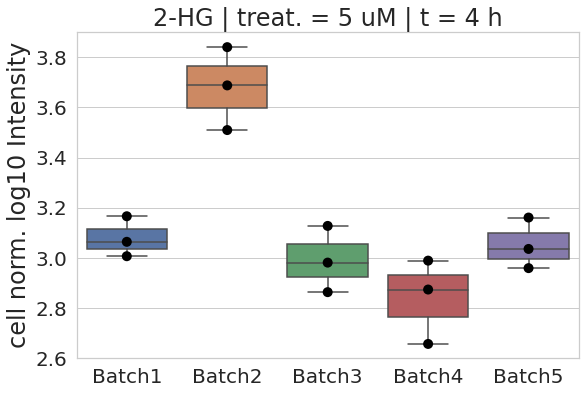

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
seaborn.boxplot(data=df)
g = seaborn.swarmplot(data=df, color='black', size=10)
g.set(ylabel='cell norm. log10 Intensity', title='2-HG | treat. = 5 uM | t = 4 h', ylim=[2.6, 3.9])

In [ ]:
#
# define function for quantile normalization
#
def quantile_normalization(df):

  "Quantile normalization consists on sorting, averaging and re-ordering."
  "For more information: https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/"
  
  # step 1/3: sorting sample values
  df_sorted = pandas.DataFrame(numpy.sort(df.values, axis=0), index=df.index, columns=df.columns)
  # step 2/3: averaging rank values across samples
  df_mean = df_sorted.mean(axis=1)
  df_mean.index = numpy.arange(1, len(df_mean) + 1)
  # step 3/3: re-ordering samples
  df.rank(method="min").astype(int)
  df_qn = df.rank(method="min").stack().astype(int).map(df_mean).unstack()

  ### extra steps, outside of quantile normalization
  
  # (1/2) use df_qn as reference to map original values, so they can be merged later
  target_means = df_qn.mean(axis=0)
  target_sds = df_qn.std(axis=0)

  original_means = df.mean(axis=0)
  original_sds = df.std(axis=0)
  df_scaled = df.subtract(original_means, axis=1).div(original_sds, axis=1)

  df_target = df_scaled.mul(target_sds, axis=1).add(target_means, axis=1)

  # (2/2) join values as one single column
  joined_values = df_target.values.flatten()

  ### case-specific convenience function to quantify batch shift
  bs = (df.mean(axis=0) - df_qn.mean(axis=0)) / df_qn.mean(axis=0)
  batch_shift = pandas.DataFrame(bs).transpose()

  return df_qn, df_target, joined_values, batch_shift

In [ ]:
df_qn, df_target, joined_values, batch_shift = quantile_normalization(df)

In [ ]:

batch_shift

,Batch1,Batch2,Batch3,Batch4,Batch5
0,-0.015727,0.176101,-0.043915,-0.092092,-0.024366


In [ ]:
print(df_qn.mean(axis=0))
print(df_qn.std(axis=0))

print(df_target.mean(axis=0))
print(df_target.std(axis=0))

Batch1    3.12831
Batch2    3.12831
Batch3    3.12831
Batch4    3.12831
Batch5    3.12831
dtype: float64
Batch1    0.12872
Batch2    0.12872
Batch3    0.12872
Batch4    0.12872
Batch5    0.12872
dtype: float64
Batch1    3.12831
Batch2    3.12831
Batch3    3.12831
Batch4    3.12831
Batch5    3.12831
dtype: float64
Batch1    0.12872
Batch2    0.12872
Batch3    0.12872
Batch4    0.12872
Batch5    0.12872
dtype: float64


[(2.6, 3.9),
 Text(0, 0.5, ' QN cell norm. log10 Intensity'),
 Text(0.5, 1.0, '2-HG | treat. = 5 uM | t = 4 h')]

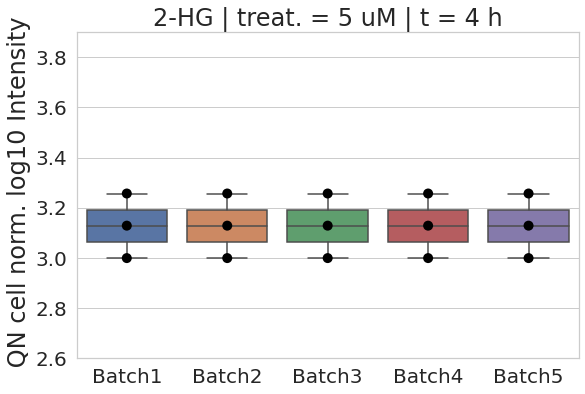

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
seaborn.boxplot(data=df_qn)
g = seaborn.swarmplot(data=df_qn, color='black', size=10)
g.set(ylabel=' QN cell norm. log10 Intensity', title='2-HG | treat. = 5 uM | t = 4 h', ylim=[2.6, 3.9])

[(2.6, 3.9),
 Text(0, 0.5, 'mapped cell norm. log10 Intensity'),
 Text(0.5, 1.0, '2-HG | treat. = 5 uM | t = 4 h')]

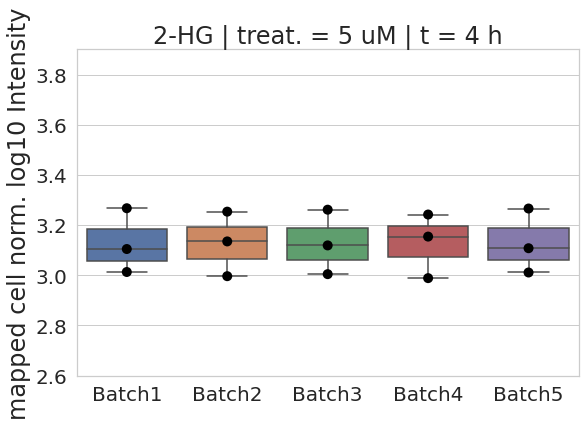

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
seaborn.boxplot(data=df_target)
g = seaborn.swarmplot(data=df_target, color='black', size=10)
g.set(ylabel='mapped cell norm. log10 Intensity', title='2-HG | treat. = 5 uM | t = 4 h', ylim=[2.6, 3.9])

In [ ]:
print(joined_values)
print(joined_values.shape)

[3.26722781 3.13494947 3.1190498  3.2421266  3.10780868 3.10462479
 3.25358184 3.00447048 3.15418572 3.01107134 3.01307778 2.99639906
 3.26141009 2.98861805 3.26605035]
(15,)


Comparison to previous batch normalization

[Text(0, 0.5, 'prev. norm. values'),
 Text(0.5, 1.0, '2-HG | treat. = 5 uM | t = 4 h')]

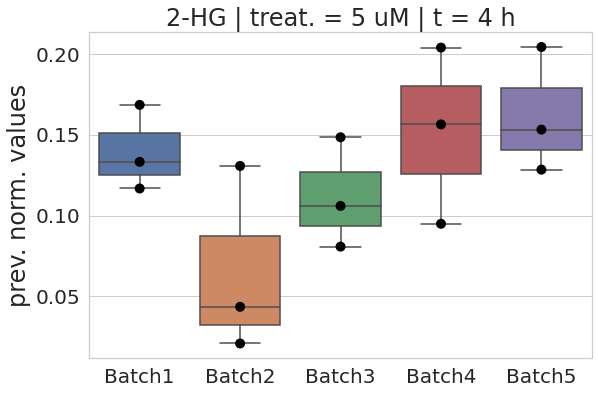

In [ ]:
previous_file = '/content/drive/MyDrive/hi/research/huvec/data/untargetted/AllBatchdata_BatchNorm.xlsx'
previous_data = pandas.read_excel(previous_file)

previous_sub = previous_data[(previous_data['Treatment'] == treatment) & (previous_data['TIME'] == timepoint)]

before_values = []
positions = []; dot_values = []
batches = range(1, 5+1)
for batch_number in batches:
  values = previous_sub[previous_sub['Batch'] == batch_number][metabolite_peak].values
  before_values.append(values)

df = pandas.DataFrame(numpy.array(before_values).transpose())
df.columns = ['Batch' + str(batch_number) for batch_number in batches]

matplotlib.pyplot.figure(figsize=(9, 6))
seaborn.boxplot(data=df)
g = seaborn.swarmplot(data=df, color='black', size=10)
g.set(ylabel='prev. norm. values', title='2-HG | treat. = 5 uM | t = 4 h')

# Correct batch effect

In [ ]:
# working variable should be log10_finite_normalize_met_by_cell
log10_finite_normalize_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,2.777383,2.989566,2.596077,3.079724,2.825603,3.009282,4.161570,3.515879,2.631235,2.669605,2.756394,3.261925,2.991681,2.842114,2.835511,2.973752,2.726700,2.949452,3.227173,2.592376,3.695296,3.572718,2.798316,2.854182,4.281776,3.527720,3.019197,3.472128,3.051624,4.163662,2.535085,3.898961,3.215750,4.219052,...,3.783250,3.457790,2.980757,3.278429,3.130836,3.434782,3.334444,2.841540,2.850954,3.093267,3.027194,3.071403,2.991838,3.024630,3.037609,3.553311,3.724726,3.735286,3.610281,2.964067,2.964047,3.138552,3.243465,3.200075,3.160923,3.231083,3.314880,3.308382,2.940298,2.986251,2.987039,3.050040,2.967344,3.024066,2.819465,3.550368,3.685031,3.804287,3.676317,3.687104
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,2.574789,3.049817,2.434369,3.099233,2.995135,2.949143,3.880326,3.437959,2.507288,2.550491,2.469269,3.322529,2.734036,2.807103,2.904619,2.914584,2.729403,2.870398,3.269787,2.484190,3.665459,3.597307,2.858158,3.069661,4.424125,3.564006,3.073461,3.522526,3.255699,4.369975,2.419979,4.103764,3.287712,4.371427,...,3.261950,3.003213,2.870625,2.843302,2.693971,3.289076,3.306102,2.681331,2.685709,3.041831,3.252879,3.199239,3.173369,3.196921,3.223076,3.719885,3.654990,3.905468,3.759753,2.709057,2.695748,3.009244,3.014978,2.980910,3.247238,3.322290,3.400128,3.395289,3.090227,3.176531,3.173476,3.172003,3.033739,3.196783,2.410505,3.686390,3.847990,3.716066,3.852966,3.866767
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,2.773185,2.858712,2.911181,2.952567,3.029268,3.270720,3.944918,3.478027,2.646480,2.911146,2.583628,2.898969,2.890075,3.250583,2.736899,2.976226,2.986355,3.104145,3.677613,2.629628,3.822165,3.874119,2.909557,2.870254,4.602172,3.708383,3.128865,3.451707,3.148199,4.267127,2.680079,3.888736,3.196300,3.713376,...,2.755970,2.813274,2.786745,2.779726,2.575175,2.970266,2.965687,2.368860,2.370583,3.034817,2.996037,2.965869,3.071546,3.077006,3.076331,3.481288,3.670368,3.411355,3.568837,2.291900,2.278762,2.781415,2.730953,2.798995,3.050793,3.173585,3.268355,3.227844,2.827961,2.956666,2.952375,2.992246,2.888343,3.064598,2.334000,3.595451,3.547835,3.587492,3.563889,3.558928
9,EC_Rosa_1_787,85,EGM,4,270000.0,0,2.793198,3.261364,2.669590,3.367940,3.280535,3.445675,4.373775,3.903656,2.820162,2.815805,2.771533,3.444332,3.183399,3.200013,2.932876,3.256056,2.806004,3.306826,3.558245,2.871553,3.905686,3.915291,2.968110,2.845512,4.580069,3.889563,3.477014,3.812731,3.378651,3.883846,2.826934,4.434001,3.726279,4.768141,...,3.760187,3.639127,3.362112,3.404414,3.220208,3.908493,3.884432,3.332305,3.330

In [ ]:
treatments = ['EGM', 1, 10, 100]
timepoints = [0, 4, 24]

conditions = [('EGM', 0), ('EGM', 4), ('EGM', 24)]
for treatment in treatments[1:]:
    for timepoint in timepoints[1:]:
        condition = (treatment, timepoint)
        conditions.append(condition)
print(conditions)

[('EGM', 0), ('EGM', 4), ('EGM', 24), (1, 4), (1, 24), (10, 4), (10, 24), (100, 4), (100, 24)]


In [ ]:
all_columns = ['Treatment', 'Time', 'Replicate'] + peak_names
peaks_ic = pandas.DataFrame(columns=all_columns)
batch_shift_ic = pandas.DataFrame(columns=['Batch' + str(batch_number) for batch_number in batches])

for condition in conditions:
  treatment = condition[0]; timepoint = condition[1]
  container = {}
  for peak_name in peak_names:
    print('working with treatment {}, timepoint {} and peak_name {}'.format(treatment, timepoint, peak_name))

    # (1/2) retrieve specific data
    sub = log10_finite_normalize_met_by_cell[(log10_finite_normalize_met_by_cell['Treatment'] == treatment) & (log10_finite_normalize_met_by_cell['TIME'] == timepoint)]

    before_values = {}
    for batch_number in batches:
      values = sub[sub['Batch'] == batch_number][peak_name].values
      # impute an average value in case of two values (Batch 5)
      if len(values) == 2:
        print('imputation')
        values = numpy.insert(values, 0, numpy.mean(values))
      if len(values) > 0:
        before_values['Batch{}'.format(batch_number)] = values

    df = pandas.DataFrame(before_values)
    print('\t found {} replicates, {} batches, {} data points'.format(df.shape[0], df.shape[1], sub.shape[0]))

    # (2/2) quantile normalization
    df_qn, df_target, joined_values, batch_shift = quantile_normalization(df)

    # (3/3) store information as needed
    container[peak_name] = joined_values

    batch_shift_ic = pandas.concat([batch_shift_ic, batch_shift], axis=0)
  
  # final storage
  for i in range(len(joined_values)):
    local_container = {'Replicate':i, 'Treatment':treatment, 'Time':timepoint}
    for peak_name in container:
      local_container[peak_name] = container[peak_name][i]
    peaks_ic = peaks_ic.append(local_container, ignore_index=True)  

Streaming output truncated to the last 5000 lines.
imputation
	 found 3 replicates, 5 batches, 14 data points
working with treatment 10, timepoint 24 and peak_name X918.83290999999997
imputation
	 found 3 replicates, 5 batches, 14 data points
working with treatment 10, timepoint 24 and peak_name X928.81326000000001
imputation
	 found 3 replicates, 5 batches, 14 data points
working with treatment 10, timepoint 24 and peak_name X928.82665999999995
imputation
	 found 3 replicates, 5 batches, 14 data points
working with treatment 10, timepoint 24 and peak_name X928.85361999999998
imputation
	 found 3 replicates, 5 batches, 14 data points
working with treatment 10, timepoint 24 and peak_name X928.86716999999999
imputation
	 found 3 replicates, 5 batches, 14 data points
working with treatment 10, timepoint 24 and peak_name X932.19215999999994
imputation
	 found 3 replicates, 5 batches, 14 data points
working with treatment 10, timepoint 24 and peak_name X932.20804999999996
imputation
	 found

In [ ]:
peaks_ic.head()

,Treatment,Time,Replicate,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EGM,0,0,2.821439,3.124491,2.616441,3.217376,3.043017,3.197272,4.307763,3.704660,2.765308,2.798424,2.902056,3.334968,3.094039,3.025382,2.884566,3.142901,2.709008,3.071986,3.386607,2.749876,3.724720,3.680670,2.854928,2.847751,4.379313,3.638480,3.136556,3.647665,3.217423,4.017526,2.710823,3.933556,3.231942,4.535770,4.692813,3.055572,4.312016,...,3.759129,3.561951,3.200265,3.375864,3.177062,3.703838,3.597935,3.096636,3.100725,3.279006,2.887612,2.979256,3.140692,3.185921,3.187390,3.692896,3.957978,3.901673,3.777269,3.212084,3.212746,3.524655,3.580375,3.484183,3.297954,3.389564,3.400843,3.455383,3.071191,3.097606,3.099440,3.101517,3.107570,3.192940,3.145987,3.715622,3.789103,3.947087,3.851484,3.835826
1,EGM,0,1,2.690833,3.129044,2.667042,3.245521,3.118299,3.314815,4.227972,3.711723,2.704722,2.680737,2.615731,3.381138,3.059378,2.999520,2.883906,3.108636,2.813840,3.202341,3.433551,2.708028,3.831653,3.836557,2.914189,2.854788,4.492962,3.764737,3.301952,3.632459,3.210970,4.025126,2.618770,4.240965,3.492230,4.242134,4.728138,3.179445,4.260895,...,3.804378,3.453993,3.119875,3.202819,3.141643,3.653205,3.614876,3.079381,3.082747,3.258084,2.939576,3.003549,3.133062,3.177375,3.178706,3.733124,3.896368,3.767640,3.883820,3.169703,3.172196,3.472035,3.491666,3.288865,3.236692,3.386271,3.483163,3.507948,3.210528,3.278386,3.292778,3.298229,3.200762,3.199623,2.984673,3.812857,3.912648,3.949868,3.974549,3.937870
2,EGM,0,2,2.683283,3.162739,2.497143,3.229593,3.140814,3.158732,3.955754,3.601296,2.588404,2.685360,2.625108,3.384905,2.933584,3.004376,2.963872,2.977434,2.711968,3.002703,3.411132,2.658845,3.678575,3.699551,2.912170,3.001594,4.509768,3.676566,3.219849,3.686092,3.366971,4.605468,2.625949,4.309296,3.604823,4.624731,4.633401,3.022088,4.302388,...,3.448490,3.286124,3.114408,3.103225,2.940447,3.494132,3.554420,2.909094,2.909047,3.211293,3.031668,3.064072,3.294098,3.339877,3.318823,3.789783,3.752094,3.992087,3.884142,2.933724,2.925259,3.270022,3.237847,3.150527,3.363390,3.457294,3.561346,3.509321,3.217736,3.301218,3.309562,3.359721,3.194526,3.361437,2.607677,3.824979,3.982661,3.891479,3.969419,3.952886
3,EGM,0,3,2.847722,3.159486,2.469182,3.145799,3.050170,3.114476,4.183452,3.613092,2.609338,2.805495,2.752284,3.339308,3.072559,3.269930,2.964258,3.177013,2.637107,2.994483,3.642056,2.801616,3.865164,3.840050,2.960220,3.001802,4.679675,3.779540,3.133842,3.686234,3.302359,4.612561,2.810598,3.807008,3.439563,4.529276,4.699124,2.990049,4.397219,...,3.257394,3.457344,3.197753,3.338838,

In [ ]:
peaks_ic.tail()

,Treatment,Time,Replicate,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
118,100,24,7,2.489912,2.974599,2.768753,3.088417,2.663325,2.949271,3.633011,3.282804,2.575468,2.859259,2.545664,3.380282,2.715474,3.146963,3.007790,2.819285,2.766875,2.792190,3.218499,2.426648,3.309059,3.445756,2.857922,2.588724,4.585443,3.396039,2.994575,3.535015,3.114673,3.162140,2.411052,3.312917,2.420340,3.498632,4.181063,2.886087,4.022873,...,3.200010,3.118154,3.041976,3.070456,2.896415,3.213623,3.193894,2.683249,2.705001,3.002715,2.230727,2.351739,2.665513,2.680146,2.738766,3.123398,3.542716,3.380203,3.371489,2.680173,2.702712,2.933298,2.934669,2.950722,2.752230,2.789002,3.138322,2.909596,2.411900,2.326422,2.338844,2.477586,2.436596,2.757495,2.585576,3.069082,3.317777,3.313068,3.302228,3.266164
119,100,24,8,2.470793,2.686079,2.331500,2.671714,2.924629,3.161433,3.605166,3.293969,2.426703,2.585070,2.320067,3.122743,2.746037,2.831900,2.813297,2.803410,2.573104,2.796217,3.244356,2.454455,3.287103,3.299806,2.440073,2.473241,4.294784,3.524526,3.138228,3.390014,3.139342,3.161759,2.378659,3.452635,2.862354,3.772476,4.282401,2.675249,4.021412,...,3.052857,2.558344,2.412093,2.389498,2.319947,2.426212,2.471828,1.935248,1.937281,2.710135,2.430235,2.637433,2.930712,2.964853,2.792534,3.098022,3.477987,3.453540,3.602362,2.019197,2.016326,2.243824,2.258954,2.305683,2.853938,2.870932,2.952750,3.088771,2.378848,2.324107,2.336326,2.471661,2.534225,2.982833,1.885411,3.575372,3.641811,3.315545,3.670722,3.566318
120,100,24,9,2.442417,2.844839,2.736338,2.882299,2.812861,3.149766,3.893882,3.350269,2.548650,2.853187,2.384828,3.120764,2.878865,3.341251,2.747753,3.075758,2.790570,3.155677,3.503733,2.594719,3.745055,3.818384,2.822361,2.957731,4.674384,3.761318,3.001778,3.494168,2.914386,4.061713,2.290947,3.844576,2.911258,3.772235,4.430578,2.987712,4.310483,...,2.643258,3.306279,3.051799,3.063497,2.892524,2.234470,2.299028,1.804600,1.804499,2.811977,2.456449,2.583646,2.919447,2.950074,2.953237,3.434270,3.640197,3.480316,3.533953,1.908220,1.905806,2.113025,2.125544,2.172497,2.970367,3.049157,3.170023,3.110360,2.677795,2.683537,2.731772,2.808338,2.697953,2.957495,1.763406,3.425790,3.578313,3.631911,3.611437,3.536360
121,100,24,10,2.562832,2.961167,2.221580,2.863486,2.662333,3.102048,4.019892,3.267446,2.426579,2.510257,2.323613,2.895134,3.005440,3.196786,2.533755,3.231798,2.432015,2.980784,3.368555,2.537173,3.722719,3.867798,2.726918,2.939895,4.571890,3.772467,3.221196,3.491406,2.964568,3.574647,2.488489,3.533453,2.781742,3.499245,4.473605,2.945566,4.327973,...,2.770837,2.924239,2.719

In [ ]:
batch_shift_ic.head()
print(batch_shift_ic.shape)

(11070, 5)


In [ ]:
11070/len(peak_names)

9.0

# Visualize batch shifts



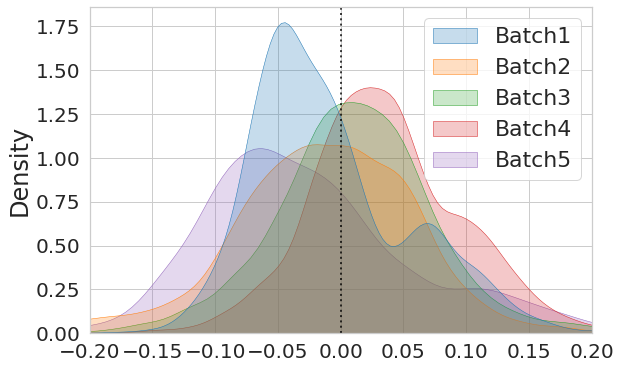

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.kdeplot(data=batch_shift_ic, fill=True, palette="tab10", alpha=1/4, linewidth=1/2)
g.set(xlim=(-0.2, 0.2))
matplotlib.pyplot.axvline(x=0, lw=2, alpha=3/4, color='black', ls=':')

# Store data for downstream analysis

In [ ]:
storing_file = '/content/drive/MyDrive/hi/research/huvec/results/untargeted/batch_normalized_cell_number_normalized_log10_intensities_untargeted_data.csv'
peaks_ic.to_csv(storing_file)
print(peaks_ic.shape)
peaks_ic.head()

(123, 1233)


,Treatment,Time,Replicate,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EGM,0,0,2.821439,3.124491,2.616441,3.217376,3.043017,3.197272,4.307763,3.704660,2.765308,2.798424,2.902056,3.334968,3.094039,3.025382,2.884566,3.142901,2.709008,3.071986,3.386607,2.749876,3.724720,3.680670,2.854928,2.847751,4.379313,3.638480,3.136556,3.647665,3.217423,4.017526,2.710823,3.933556,3.231942,4.535770,4.692813,3.055572,4.312016,...,3.759129,3.561951,3.200265,3.375864,3.177062,3.703838,3.597935,3.096636,3.100725,3.279006,2.887612,2.979256,3.140692,3.185921,3.187390,3.692896,3.957978,3.901673,3.777269,3.212084,3.212746,3.524655,3.580375,3.484183,3.297954,3.389564,3.400843,3.455383,3.071191,3.097606,3.099440,3.101517,3.107570,3.192940,3.145987,3.715622,3.789103,3.947087,3.851484,3.835826
1,EGM,0,1,2.690833,3.129044,2.667042,3.245521,3.118299,3.314815,4.227972,3.711723,2.704722,2.680737,2.615731,3.381138,3.059378,2.999520,2.883906,3.108636,2.813840,3.202341,3.433551,2.708028,3.831653,3.836557,2.914189,2.854788,4.492962,3.764737,3.301952,3.632459,3.210970,4.025126,2.618770,4.240965,3.492230,4.242134,4.728138,3.179445,4.260895,...,3.804378,3.453993,3.119875,3.202819,3.141643,3.653205,3.614876,3.079381,3.082747,3.258084,2.939576,3.003549,3.133062,3.177375,3.178706,3.733124,3.896368,3.767640,3.883820,3.169703,3.172196,3.472035,3.491666,3.288865,3.236692,3.386271,3.483163,3.507948,3.210528,3.278386,3.292778,3.298229,3.200762,3.199623,2.984673,3.812857,3.912648,3.949868,3.974549,3.937870
2,EGM,0,2,2.683283,3.162739,2.497143,3.229593,3.140814,3.158732,3.955754,3.601296,2.588404,2.685360,2.625108,3.384905,2.933584,3.004376,2.963872,2.977434,2.711968,3.002703,3.411132,2.658845,3.678575,3.699551,2.912170,3.001594,4.509768,3.676566,3.219849,3.686092,3.366971,4.605468,2.625949,4.309296,3.604823,4.624731,4.633401,3.022088,4.302388,...,3.448490,3.286124,3.114408,3.103225,2.940447,3.494132,3.554420,2.909094,2.909047,3.211293,3.031668,3.064072,3.294098,3.339877,3.318823,3.789783,3.752094,3.992087,3.884142,2.933724,2.925259,3.270022,3.237847,3.150527,3.363390,3.457294,3.561346,3.509321,3.217736,3.301218,3.309562,3.359721,3.194526,3.361437,2.607677,3.824979,3.982661,3.891479,3.969419,3.952886
3,EGM,0,3,2.847722,3.159486,2.469182,3.145799,3.050170,3.114476,4.183452,3.613092,2.609338,2.805495,2.752284,3.339308,3.072559,3.269930,2.964258,3.177013,2.637107,2.994483,3.642056,2.801616,3.865164,3.840050,2.960220,3.001802,4.679675,3.779540,3.133842,3.686234,3.302359,4.612561,2.810598,3.807008,3.439563,4.529276,4.699124,2.990049,4.397219,...,3.257394,3.457344,3.197753,3.338838,